# Model Interpretability of CNN Image Classification Model using LIME

## 1. Abstract

The idea of the project is to ***interpret Convolutional Neural Network(CNN)***, a complex black box deep learning model used for classifying the famous cat vs dog dataset taken from Kaggle.<br>

The CNN has a ***five layer architecture*** which has an ***input, convolution, pooling, fully connected and an output layer*** with ***ReLU as an activation function*** and ***RMSProp as the optimizer***. <br>

To ensure the model did not overfit, we used ***Keras callbacks***<br>

These images are then interpreted using ***Locally interpretable Model-Agnostic Explanations(LIME) algorithm***<br>

Data was **trained on 20000 images, validated on 5000 images and tested on 12500 images with an accuracy of 0.889 on the training data**



1. [Abstract](#1.-Abstract)
2. [Acknowledgements](#2.-Acknowledgements)
3. [Introduction](#3.-Introduction)
4. [Running the ipynb file](#4.-Running-the-ipynb-file)
5. [Importing Libraries](#5.-Importing-Libraries)
6. [Data Pre-Processing](#6.-Data-Pre-Processing)
<br>   6.1 [Define Constants](#6.1-Define-Constants)
<br>   6.2 [Data Preparation](#6.2-Data-Preparation)
<br>   6.3 [Lets Compare](#6.3-Lets-Compare)
<br>   6.4 [See Sample Image](#6.4-See-Sample-Image)
7. [Data Processing](#7.-Data-Processing)
<br>   7.1 [Implementing a CNN](#7.1-Implementing-a-CNN)
<br>   7.2 [Model Architecture](#7.2-Model-Architecture)
<br>   7.3 [Implementation](#7.3-Implementation)
<br>   7.4 [Callbacks](#7.4-Callbacks)
<br>   7.5 [Prepare data](#7.5-Prepare-data)
<br>   7.6 [Fit Model](#7.6-Fit-Model)
<br>   7.7 [Save Model](#7.7-Save-Model)
<br>   7.8 [Virtualize Training](#7.8-Virtualize-Training)
<br>   7.9 [Prepare Testing Data](#7.9-Prepare-Testing-Data)
<br>   7.10 [Create Testing Generator](#7.10-Create-Testing-Generator)
<br>   7.11 [Predict](#7.11-Predict)
<br>   7.12 [Virtualize Result](#7.12-Virtaulize-Result)
8. [LIME](#8.-LIME)
<br>   8.1 [Import libraries for LIME](#8.1.-Import-libraries-for-LIME)
<br>   8.2 [Loading a pretrained Imagenet model](#8.2.-Loading-a-pretrained-Imagenet-model)
<br>   8.3 [Let's see the top 5 prediction for some image](#8.3.-Let's-see-the-top-5-prediction-for-some-image)
<br>   8.4 [Understanding the features](#8.4.-Understanding-the-features)
9. [Conclusion](#9.-Conclusion)
10. [Contribution](#10.-Contribution)
11. [Citations](#11.-Citations)
12. [License](#12.-License)
 

## 2. Acknowledgements

This data has been provided by Microsoft Research and has been taken from the Kaggle competion "Dogs vs. Cats". 
https://www.kaggle.com/c/dogs-vs-cats

## 3. Introduction

Machine Learning models have been branded as **‘Black Boxes’** by many. This means that though we can get accurate predictions from them, we cannot clearly explain or identify the logic behind these predictions. But how do we if our model is doing good or bad for the right reasons? What things are to be kept in mind and what features or tools will we need to achieve good results? How should we tweak it or how much should we tweak it to get the desired results? 
These are the important questions which come to mind when the issue of **Model Explainability** is raised.
<br>

**Interpretability is the degree to which a human can understand the cause of a decision and consistently predict the model’s result**  The higher the interpretability of a machine learning model, the easier it is for someone to comprehend why certain decisions or predictions have been made. One model is better interpretable than another model if its decisions are easier for a human to comprehend than decisions from the other model. 
<br>

The question that some of the people often ask is why aren’t we just content with the results of the model and why are we so hell-bent on knowing why a particular decision was made? Isn't accuracy enough? Aren't the scores and the efficiency rate enough to trust these models?  
<br>

A lot of this has to do with the impact that a model might have in the real world. For **models which are merely meant to recommend movies will have a far less impact even if they are using wrong features to make their predictions than the ones having a much larger impact like the ones created to predict the outcome of a drug.**
<br>
![Why did you predict this?](https://christophm.github.io/interpretable-ml-book/images/iml.png)



**Why would you want to understand and interpret the model?**
<br>

 - Increases trust in the model
 - Can be relied upon
 - Helps in making informed decions
 - Increses precision in feature engineering
 - Helps understand the bias in the raw data or the constructed model
 
 <br>
 
 ![Markertoonist](https://marketoonist.com/wp-content/uploads/2017/11/171127.machinelearning.jpg)
 
 


## 4. Running the ipynb file


This ipynb file was run on **Google Colab with a GPU** due to the time it was taking to train this deep layered Convolutional Neural Network model without a GPU on the local system.

**Steps to run this notebook on Google Colab:**

- Open **Google colab** 
- Change the **name** of the ipynb file
- Go to **Runtime** and **Change Runtime type** to GPU in the **Hardware accelerator** dropdown
- **For Uploading data zip file from the local system**
     - On the left panel click on **Upload** and **select the zip file from the system** (It would take a while to load depending on the size of the file)
- **Run** the code (either cell-wise or run all)





## 5. Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

#The below lines of code helps in importing the zip file containing the images from the local system to Google Colab

from zipfile import ZipFile
file_name = "dogs-vs-cats.zip" #The zip file which has sub zip files(i.e train.zip, test.zip, submission.csv)

with ZipFile(file_name,'r') as zip:
  zip.extractall() #Extracting all the folders from the zip folder
  print('Done')

Using TensorFlow backend.


Done


## 6. Data Pre-Processing 

### 6.1 Define Constants

In [1]:
#Defining the constants for the images imported

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### 6.2 Data Preparation

In [3]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

filenames = os.listdir("train")
#filenames = "train"
random.shuffle(filenames)


#Enumerating the two caterories(i.e 'cat' and 'dog' into '0' and '1' respectively)
    
categories = []
for filename in filenames:         
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Done


In [4]:
df.head()

,filename,category
0,dog.11685.jpg,1
1,dog.3694.jpg,1
2,dog.6772.jpg,1
3,dog.11710.jpg,1
4,cat.6220.jpg,0


In [5]:
df.tail()

,filename,category
24995,cat.3281.jpg,0
24996,cat.8502.jpg,0
24997,dog.5205.jpg,1
24998,dog.4997.jpg,1
24999,dog.10138.jpg,1


### 6.3 Lets Compare

Comparing the count of images of both categories

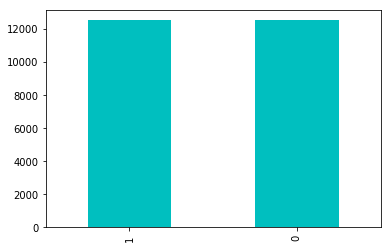

In [6]:
barplot = df['category'].value_counts().plot.bar(color = 'c')

***Here we notice that the number of cat and dog images are equal i.e we have 12000 cats and 12000 dogs***

### 6.4 See Sample Image

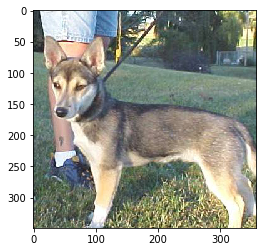

In [7]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

## 7. Data Processing

### 7.1 Implementing a CNN


**Convolutional neural networks (CNN)** is a special architecture of artificial neural networks, proposed by Yann LeCun in 1988. CNN uses some features of the visual cortex. One of the most popular uses of this architecture is image classification. For example Facebook uses CNN for automatic tagging algorithms, Amazon — for generating product recommendations and Google — for search through among users’ photos.
<br>

The main task of image classification is acceptance of the input image and the following definition of its class and computer sees the pictures quite differently.
<br>

Instead of the image, the computer sees an array of pixels. For example, if image size is 300 x 300. In this case, the size of the array will be 300x300x3. Where 300 is width, next 300 is height and 3 is RGB channel values. The computer is assigned a value from 0 to 255 to each of these numbers. Тhis value describes the intensity of the pixel at each point.


### 7.2 Model Architecture

![Capture](https://i.imgur.com/ebkMGGu.jpg)

 - **Input Layer:** It represent input image data. It will reshape image into single diminsion array. <br>
Example your image is 64x64 = 4096, it will convert to (4096,1) array. <br>
 - **Convolution Layer:** This layer will extract features from image. <br>
 - **Pooling Layer:** This layerreduce the spatial volume of input image after convolution. <br>
 - **Fully Connected Layer:** It connect the network from a layer to another layer. <br>
 - **Output Layer:** It is the predicted values layer. <br>
 
<br>
  
 **I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.**<br>

 - The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.<br>
 

 - The CNN can isolate features that are useful everywhere from these transformed images (feature maps).<br>


 - The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.<br>


 - Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.<br>
 

 - Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.<br>
 

 - 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.<br>
 

 - The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.<br>
 

 - In the end I used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(2,activation="softmax")) the net outputs distribution of probability of each class.
 

### 7.3 Implementation

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #Droupout 25% of the nodes from the visible layer(First layer)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) #Droupout 50% of the nodes from the visible layer(First layer)

model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0816 14:04:35.209177 140645866653568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 14:04:35.260662 140645866653568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 14:04:35.267457 140645866653568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 14:04:35.309886 140645866653568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0816 14:04:35.310851 1406458666

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

### 7.4 Callbacks

A **callback** is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.<br>
Keras callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.
<br>

**Here we use 2 callback functions:**

 - **Early Stopping** - One technique to reduce overfitting in neural networks is to use early stopping. Early stopping prevents overtraining of the model by terminating the training process if it’s not really learning anything.<br>
 
 - **Learning Rate Reduction** - The learning rate determines the size of the steps taken during the gradient descent process.

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### 7.4.1 Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [0]:
earlystop = EarlyStopping(patience=10)

#### 7.4.2 Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

### 7.5 Prepare data


Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then image generator will convert it into one-hot encoding for our classification.

*So we will convert 1 to dog and 0 to cat*
<br>

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

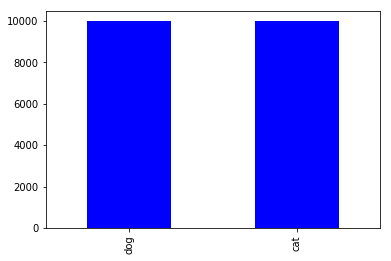

In [15]:
train_df['category'].value_counts().plot.bar(color = 'b')

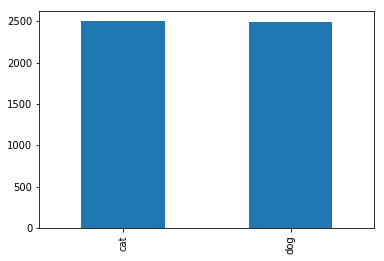

In [16]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

***We would be divinding the data into train, validate and test data***

#### 7.5.1 Traning Generator

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,"train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


#### 7.5.2 Validation Generator

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,"train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


#### 7.5.3 See how our generator work

In [20]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,"train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


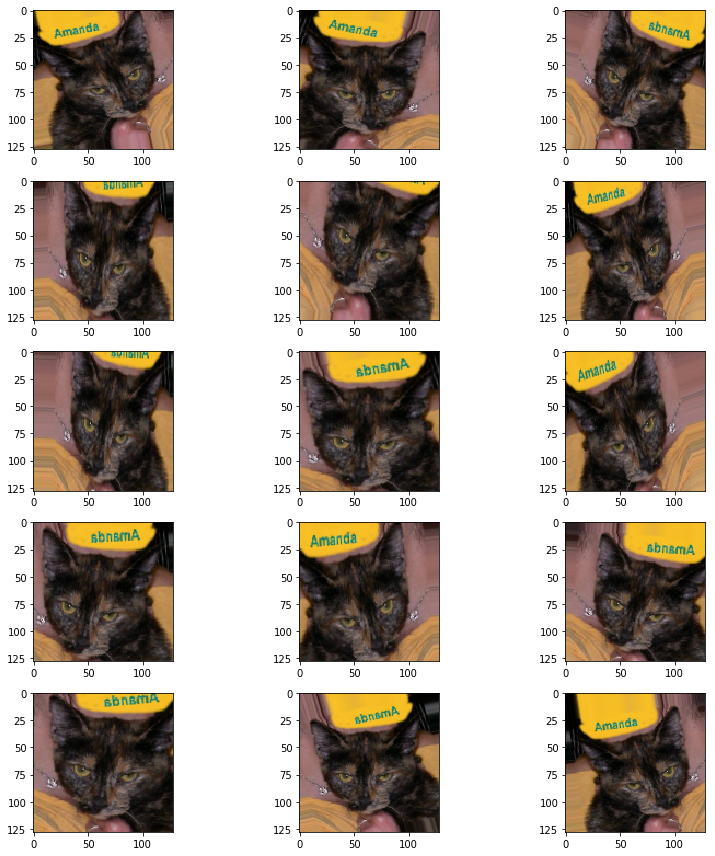

In [21]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 7.6 Fit Model

In [22]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

W0816 14:09:59.654655 140645866653568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
1333/1333 [==============================] - 137s 102ms/step - loss: 0.7413 - acc: 0.6353 - val_loss: 0.5968 - val_acc: 0.6827
Epoch 2/50
1333/1333 [==============================] - 130s 98ms/step - loss: 0.5593 - acc: 0.7209 - val_loss: 0.6035 - val_acc: 0.7410
Epoch 3/50
1333/1333 [==============================] - 130s 98ms/step - loss: 0.5063 - acc: 0.7551 - val_loss: 0.8514 - val_acc: 0.7123
Epoch 4/50
1333/1333 [==============================] - 131s 98ms/step - loss: 0.4801 - acc: 0.7745 - val_loss: 0.5017 - val_acc: 0.7735
Epoch 5/50
1333/1333 [==============================] - 131s 98ms/step - loss: 0.4492 - acc: 0.7969 - val_loss: 0.4695 - val_acc: 0.7819
Epoch 6/50
1333/1333 [==============================] - 130s 98ms/step - loss: 0.4237 - acc: 0.8083 - val_loss: 0.7347 - val_acc: 0.7631
Epoch 7/50
1333/1333 [==============================] - 130s 97ms/step - loss: 0.4107 - acc: 0.8172 - val_loss: 0.7152 - val_acc: 0.7647

Epoch 00007: ReduceLROnPlateau reducing

While fitting the model we notice that as soon as the score plateaus, the learning rate drops.  <br>
***During our fitting of the mode, the learning rate changed 7 times***

### 7.7 Save Model

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### 7.8 Virtualize Training

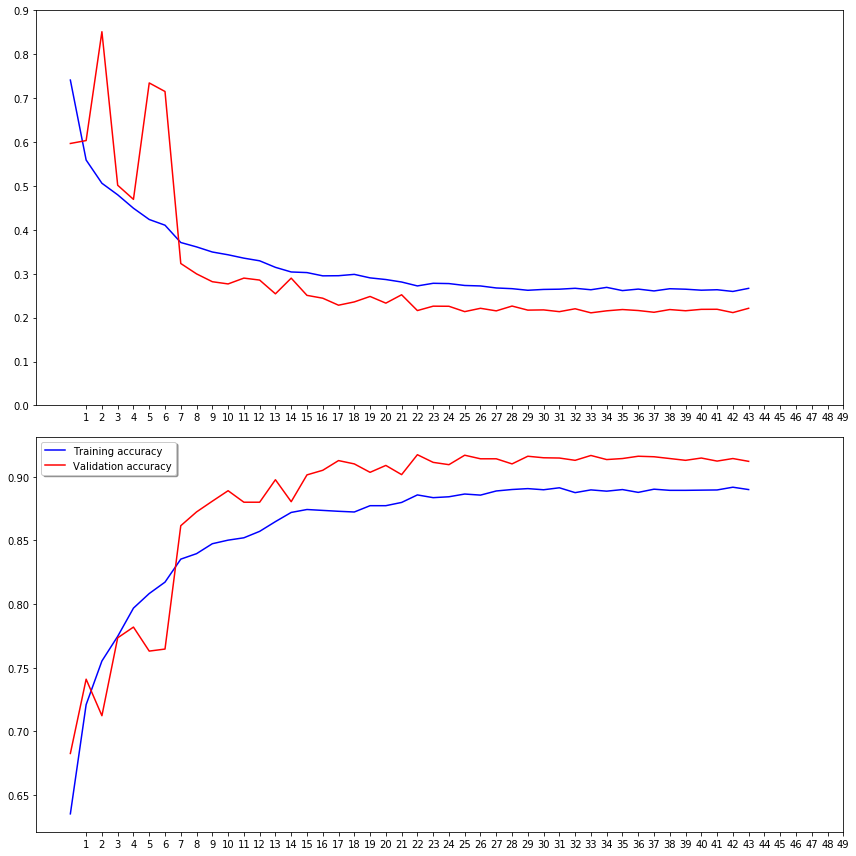

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

***Looking at the above graph we can say that the model performs well on both training and validation(unseen data)***

### 7.9 Prepare Testing Data

In [27]:
from zipfile import ZipFile
file_name = "test1.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

Done


### 7.10 Create Testing Generator

In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,"test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


### 7.11 Predict

In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [0]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [0]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### 7.12 Virtaulize Result

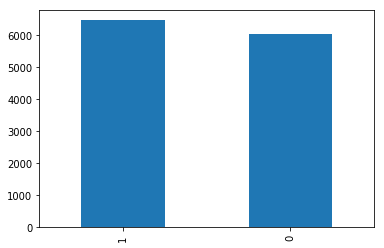

In [34]:
test_df['category'].value_counts().plot.bar()

See predicted result with images

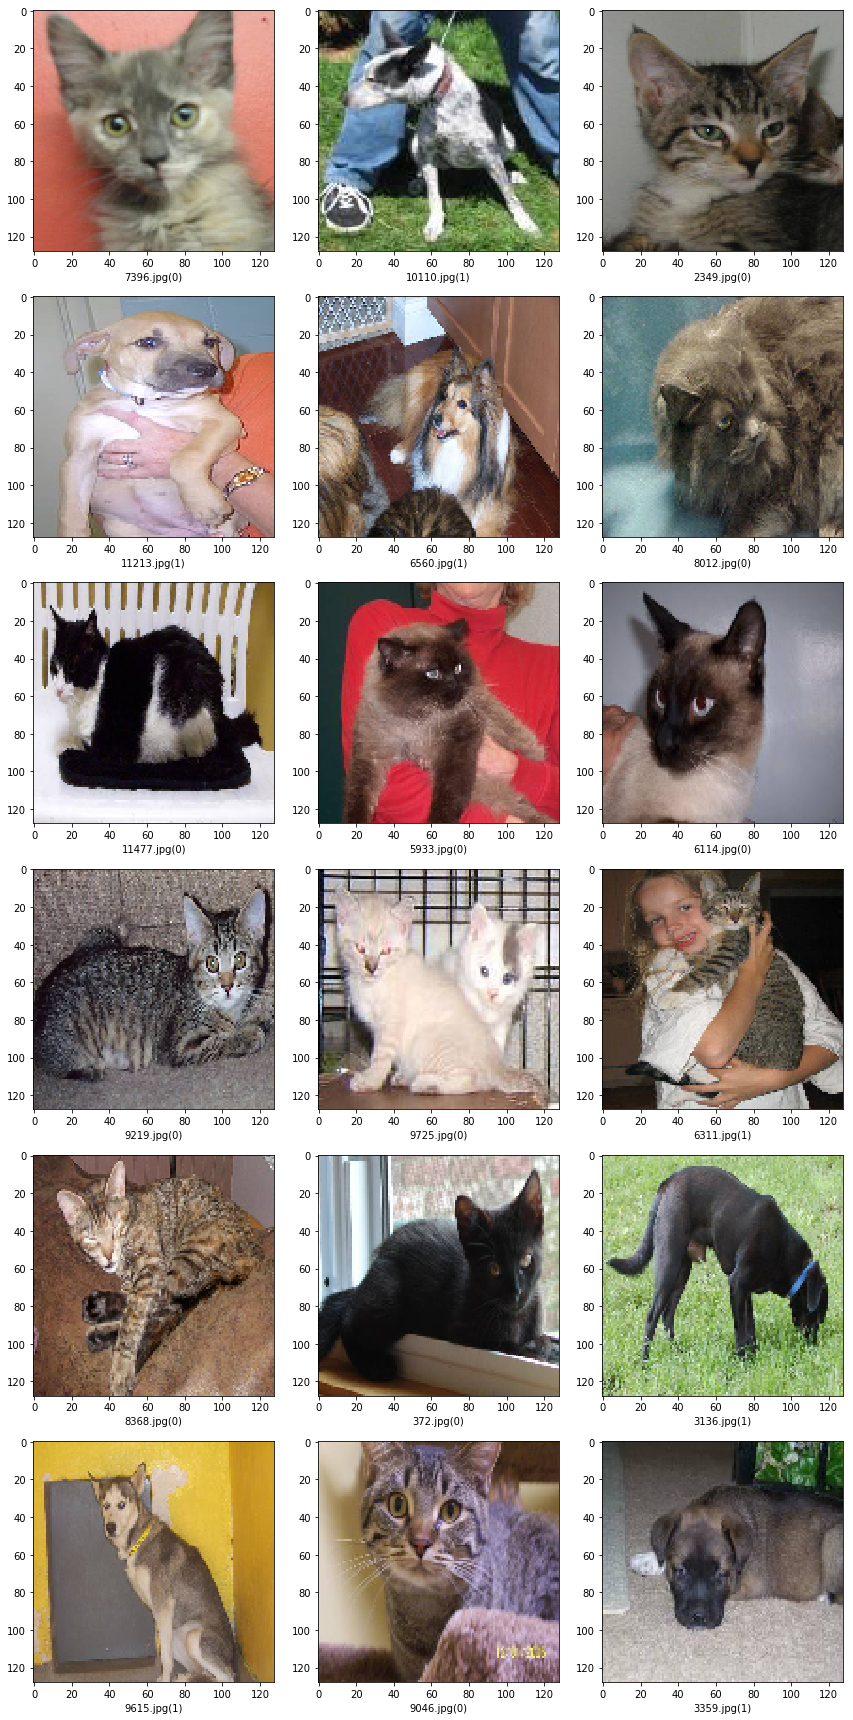

In [36]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

We just had one misclassification out of these 18 images above

In [0]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

## 8. LIME

***LIME*** is short for ***Local Interpretable Model-Agnostic Explanations***. <br>

Each part of the name reflects something that we desire in explanations. **Local** refers to **local fidelity - i.e., we want the explanation to really reflect the behaviour of the classifier "around" the instance being predicted**. <br>
This explanation is useless unless it is **interpretable** - that is, unless a human can make sense of it. <br>
**LIME** is able to explain any model without needing to 'peak' into it, so it is **model-agnostic**. 

###  8.1. Import libraries for LIME

In [60]:
import os 
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.2.4


### 8.2. Loading a pretrained Imagenet model

ImageNet is a project which aims to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes ( or synsets )

In [39]:
inet_model = inc_net.InceptionV3()

W0816 15:55:03.167082 140645866653568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



96116736/96112376 [==============================] - 7s 0us/step


In [0]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

### 8.3. Let's see the top 5 prediction for some image

Randomly selecting an image from the test data

In [65]:
randon_test_image= random.choice([x for x in os.listdir("test1")
               if os.path.isfile(os.path.join("test1", x))])

#randon_test_image

img = "randon_test_image"

eval(img)

'10529.jpg'

('n02123045', 'tabby', 0.5988226)
('n02123159', 'tiger_cat', 0.22055224)
('n02124075', 'Egyptian_cat', 0.04513316)
('n02127052', 'lynx', 0.028892234)
('n04553703', 'washbasin', 0.006856413)


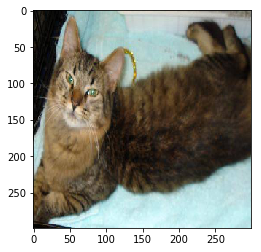

In [66]:
image_1 = transform_img_fn([os.path.join('test1',eval(img))])
#image = transform_img_fn([os.path.join('data','test//4385.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(image_1[0] / 2 + 0.5)
preds = inet_model.predict(image_1)
for x in decode_predictions(preds)[0]:
    print(x)

We see that the data has been correctly classified and has been verified with the imagenet data set giving out top 5 predictions.<br>

This cat is very much similar to a tabby cat and has a probabbility of 59% being a tabby cat, followed by a probability of 22% being a tiger-cat.

![Tabby cat](https://c8m6i5n4.stackpathcdn.com/wp-content/uploads/2019/01/Facts-About-Tabby-Cats.jpg) 

In [70]:
randon_test_image_2= random.choice([x for x in os.listdir("test1")
               if os.path.isfile(os.path.join("test1", x))])

img2 = "randon_test_image_2"

eval(img2)

'10080.jpg'

('n02107312', 'miniature_pinscher', 0.621508)
('n02107142', 'Doberman', 0.1873805)
('n02106550', 'Rottweiler', 0.01892752)
('n02087046', 'toy_terrier', 0.017181238)
('n02089078', 'black-and-tan_coonhound', 0.012505722)


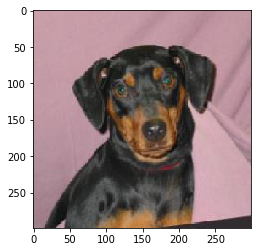

In [71]:
image_2 = transform_img_fn([os.path.join('test1',eval(img2))])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(image_2[0] / 2 + 0.5)
preds = inet_model.predict(image_2)
for x in decode_predictions(preds)[0]:
    print(x)

In this case, the prediction is that it looks very similar to a miniature_pinscher with a probability of 62%

![Miniature_pischer](https://dogsaholic.com/wp-content/uploads/2016/06/Miniature-Pinscher.jpg)

In [73]:
!pip install -q lime

%reload_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

     |████████████████████████████████| 276kB 1.4MB/s 


In [0]:
explainer = lime_image.LimeImageExplainer()

In [76]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image_1[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 11.6 s, sys: 2.54 s, total: 14.1 s
Wall time: 13.6 s


### 8.4. Understanding the features

This step is to understand the features that contributed to making this decision

In [0]:
from skimage.segmentation import mark_boundaries #Using segmentation to understand better

### 8.4.1. Image 1

***The highlighted section only states the features that contributed to making this decision of the image being a cat and not a dog***<br>

The features considered for making this decison are 5

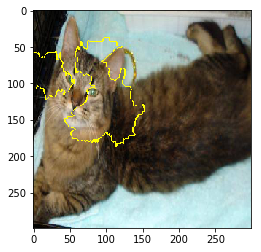

In [78]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

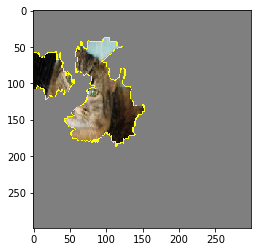

In [79]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

***Now by increasing the number of feature, the green area comprises of the features positively affecting in making this decision and the light red ones either do not contribute and the deep red are the ones that negatively contribute to this image for being classified as a cat***

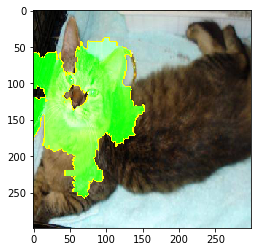

In [80]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

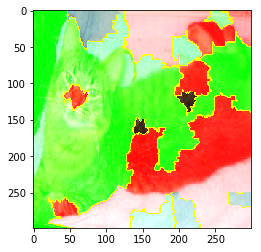

In [81]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1200, hide_rest=False, min_weight=0.001)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

***Similarly in the case of a randomly selected second image, all the comparisons are made with a variation of a dog family and the highlighted section contributed in classifying the image as a dog and not a cat***

### 8.4.2. Image 2

In [84]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image_2[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 10.7 s, sys: 1.88 s, total: 12.6 s
Wall time: 12.1 s


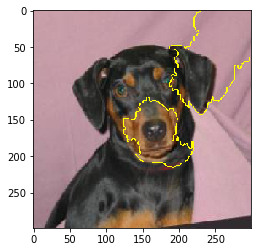

In [85]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

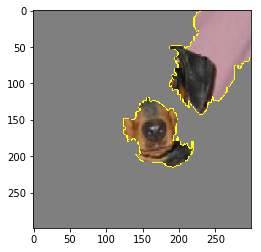

In [86]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

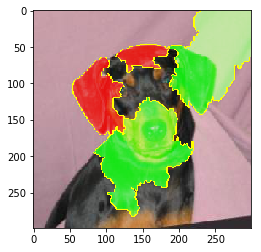

In [87]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

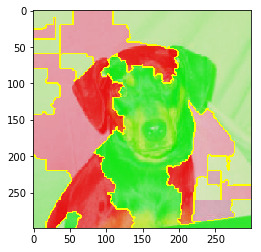

In [88]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1200, hide_rest=False, min_weight=0.001)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## 9. Conclusion

 - By looking at the above model we can say that the it has performed well, and achieved an ***accuracy of 88.9% on the training data with 20,000 images.***<br>
 

 - We can conclude by saying that, ***LIME explains why a certain decision has been made***.<br>
 
 
 - Features that were taken into consideration while differentiating between a cat and a dog were the ***nose, the ears, face and the structure of the body which makes sense to be considered.***<br>
 
 
 - If the differentiating factor was to be a ***bell in the neck, a dog collar or the background***, that would ***not be serving a good set of features to be used to analyze***.
 

## 10. Contribution

**External: 60%**

**Self: 40%**

## 11. Citations

https://homes.cs.washington.edu/~marcotcr/blog/lime/<br>
https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification<br>
https://towardsdatascience.com/interpretable-machine-learning-1dec0f2f3e6b<br>
https://christophm.github.io/interpretable-ml-book/terminology.html<br>
https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b<br>
https://towardsdatascience.com/interpretability-in-machine-learning-70c30694a05f<br>
https://arxiv.org/pdf/1602.04938v1.pdf<br>
https://christophm.github.io/interpretable-ml-book/interpretability.html<br>


## 12. License

Copyright 2019 Manogna Mantripragada

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.